In [1]:
import sys
sys.path.insert(1, '../..')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from ProdSeqAnalysis_utils import *
# plt.rcParams['svg.fonttype'] = 'none'
# plt.rcParams["font.family"] = "Arial"
from matplotlib.patches import ConnectionPatch
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [2]:
TazDMSO_UMIpath = "/path/to/HEK293T_output.DepthNormedUMIPairs.tsv"
UMI_cnts_signal, UMI_cnts_nms, UMI_cnts_pairnms = ReadProdTSVFile(TazDMSO_UMIpath)

In [3]:
bc_nms = [
    "H3K4me3", 
    "H3K27ac", 
    "H3K27me3", "EZH2", "EED", "SUZ12", "AEBP2", 
    "MED12", "CycC", 
    "H3K27M",
    "EGFR", "HA-Tag"
]

color_thres_num = 50
colors1 = plt.cm.Greens(np.linspace(0, 1, color_thres_num))
colors2 = plt.cm.Greens(np.linspace(1, 1, 256 - color_thres_num))
colors = np.vstack((colors1, colors2))
customized_cmap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)
customized_cmap.set_bad(color='black')

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

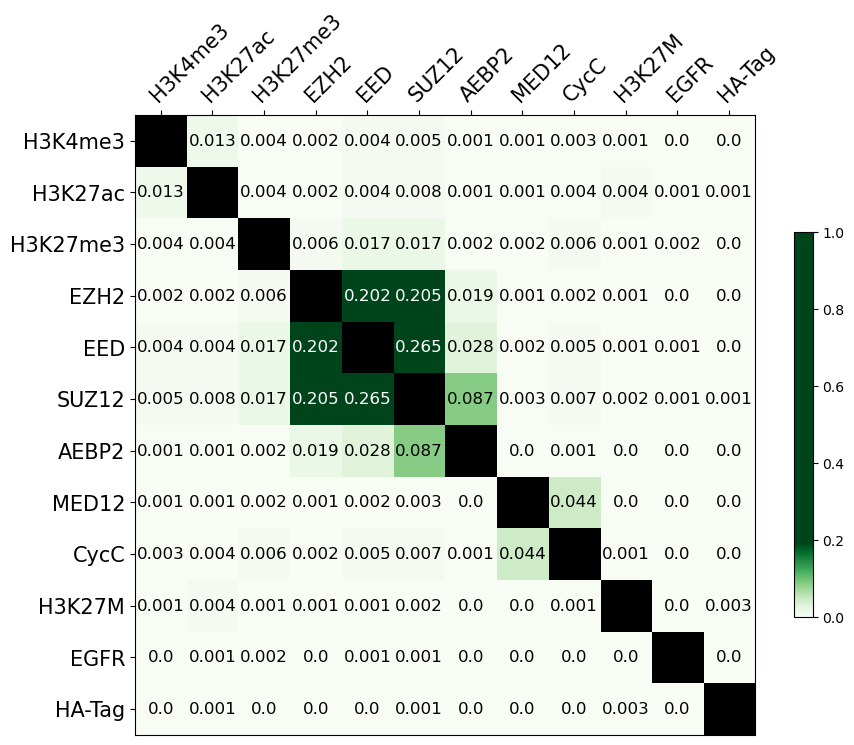

In [4]:
DMSO_props = UMI_cnts_signal[0]
DMSO_mat = np.zeros((len(bc_nms), len(bc_nms)))
linear_idx = 0
for i in range(len(bc_nms)):
    DMSO_mat[i][i] = np.nan
    for j in range(i + 1, len(bc_nms)):
        DMSO_mat[i][j] = (DMSO_props[linear_idx]) / sum(DMSO_props)
        DMSO_mat[j][i] = (DMSO_props[linear_idx]) / sum(DMSO_props)
        linear_idx += 1
    
fig, ax = plt.subplots(figsize = (10, 10))
im = ax.imshow(DMSO_mat, cmap = customized_cmap, vmin = 0, vmax = 1)

ax.set_xticks(np.arange(len(bc_nms)))
ax.set_yticks(np.arange(len(bc_nms)))
ax.set_xticklabels(bc_nms, fontsize = 15)
ax.set_yticklabels(bc_nms, fontsize = 15)
ax.xaxis.tick_top()
fig.colorbar(im, ax = ax, shrink = 0.5)
plt.setp(ax.get_xticklabels(), rotation = 45, ha = "left",
     rotation_mode = "anchor")

for i in range(len(bc_nms)):
    for j in range(len(bc_nms)):
        if (i == j):
            continue
        curr_val = round((DMSO_mat[i][j]), 3)
        if (curr_val < 0.1):
            colorUse = "k"
        else:
            colorUse = "white"
        text = ax.text(j, i, curr_val,
                       ha = "center", va = "center", color = colorUse, fontsize = 12)

# fig.savefig("HEKDMSO_heatmap.svg", dpi = 1200)

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

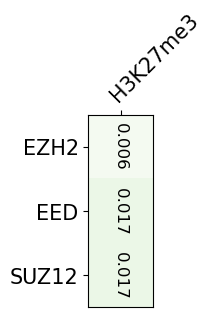

In [5]:
fig, ax = plt.subplots(figsize = (10/12, 10/4))

im = ax.imshow([[x[2]] for x in DMSO_mat[3:6]], cmap = customized_cmap, vmin = 0, vmax = 1)

ax.set_xticks(np.arange(1))
ax.set_yticks(np.arange(3))
ax.set_xticklabels([bc_nms[2]])
ax.set_yticklabels(bc_nms[3:6])
ax.tick_params(axis='both', which='major', labelsize=15) 
ax.xaxis.tick_top()
# fig.colorbar(im, ax = ax, shrink = 0.5)
plt.setp(ax.get_xticklabels(), rotation = 45, ha = "left",
     rotation_mode = "anchor")

for i in [2]:
    for j in [3, 4, 5]:
        curr_val = round((DMSO_mat[i][j]), 3)
        if (curr_val < 0.1):
            colorUse = "k"
        else:
            colorUse = "white"
        text = ax.text(i - 2, j - 3, curr_val,
                       ha = "center", va = "center", color = colorUse, fontsize = 12, rotation = 270)

# fig.savefig("HEKDMSO_heatmap_zoomin.svg", dpi = 1200)

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

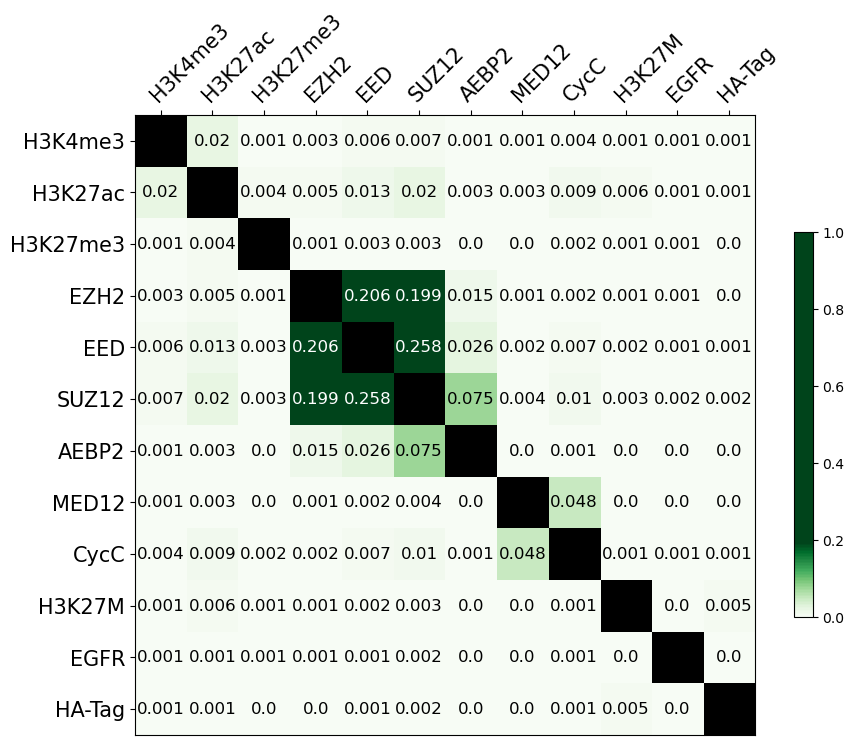

In [6]:
Taz_props = UMI_cnts_signal[2]
Taz_mat = np.zeros((len(bc_nms), len(bc_nms)))
linear_idx = 0
for i in range(len(bc_nms)):
    Taz_mat[i][i] = np.nan
    for j in range(i + 1, len(bc_nms)):
        Taz_mat[i][j] = (Taz_props[linear_idx]) / sum(Taz_props)
        Taz_mat[j][i] = (Taz_props[linear_idx]) / sum(Taz_props)
        linear_idx += 1
    
fig, ax = plt.subplots(figsize = (10, 10))
im = ax.imshow(Taz_mat, cmap = customized_cmap, vmin = 0, vmax = 1)

ax.set_xticks(np.arange(len(bc_nms)))
ax.set_yticks(np.arange(len(bc_nms)))
ax.set_xticklabels(bc_nms, fontsize = 15)
ax.set_yticklabels(bc_nms, fontsize = 15)
ax.xaxis.tick_top()
fig.colorbar(im, ax = ax, shrink = 0.5)
plt.setp(ax.get_xticklabels(), rotation = 45, ha = "left",
     rotation_mode = "anchor")

for i in range(len(bc_nms)):
    for j in range(len(bc_nms)):
        if (i == j):
            continue
        curr_val = round((Taz_mat[i][j]), 3)
        if (curr_val < 0.1):
            colorUse = "k"
        else:
            colorUse = "white"
        text = ax.text(j, i, curr_val,
                       ha = "center", va = "center", color = colorUse, fontsize = 12)

# fig.savefig("Taz_heatmap.svg", dpi = 1200)

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

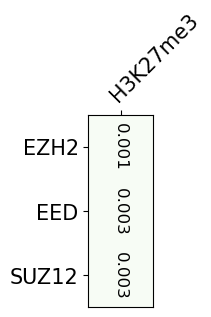

In [7]:
fig, ax = plt.subplots(figsize = (10/12, 10/4))

im = ax.imshow([[x[2]] for x in Taz_mat[3:6]], cmap = customized_cmap, vmin = 0, vmax = 1)

ax.set_xticks(np.arange(1))
ax.set_yticks(np.arange(3))
ax.set_xticklabels([bc_nms[2]])
ax.set_yticklabels(bc_nms[3:6])
ax.tick_params(axis='both', which='major', labelsize=15) 
ax.xaxis.tick_top()
# fig.colorbar(im, ax = ax, shrink = 0.5)
plt.setp(ax.get_xticklabels(), rotation = 45, ha = "left",
     rotation_mode = "anchor")

for i in [2]:
    for j in [3, 4, 5]:
        curr_val = round((Taz_mat[i][j]), 3)
        if (curr_val < 0.1):
            colorUse = "k"
        else:
            colorUse = "white"
        text = ax.text(i - 2, j - 3, curr_val,
                       ha = "center", va = "center", color = colorUse, fontsize = 12, rotation = 270)

# fig.savefig("HEKTaz_heatmap_zoomin.svg", dpi = 1200)

In [8]:
TazDMSObio1_signalpath = "/path/to/HEK293T_bio1_output.PPIEnrichment.tsv"
TazDMSObio1_signals, TazDMSObio1_nms, TazDMSObio1_pairnms = ReadProdTSVFile(TazDMSObio1_signalpath)

TazDMSObio2_signalpath = "/path/to/HEK293T_bio2_output.PPIEnrichment.tsv"
TazDMSObio2_signals, TazDMSObio2_nms, TazDMSObio2_pairnms = ReadProdTSVFile(TazDMSObio2_signalpath)

TazDMSO_signals = [
    TazDMSObio2_signals[1],
    TazDMSObio2_signals[0],
    TazDMSObio1_signals[1],
    TazDMSObio1_signals[0],
    TazDMSObio2_signals[3],
    TazDMSObio2_signals[2],
    TazDMSObio1_signals[3],
    TazDMSObio1_signals[2],
]

TazDMSO_signals_normed = []
for row in TazDMSO_signals:
    TazDMSO_signals_normed.append([x/row[49] for x in row])

TazDMSO_pairnms = TazDMSObio2_pairnms

TazDMSO_nms = [
    TazDMSObio2_nms[1],
    TazDMSObio2_nms[0],
    TazDMSObio1_nms[1],
    TazDMSObio1_nms[0],
    TazDMSObio2_nms[3],
    TazDMSObio2_nms[2],
    TazDMSObio1_nms[3],
    TazDMSObio1_nms[2],
]

TazDMSO_signals_normed_avg = []
TazDMSO_nms_avg = []
for row_idx in [0, 2, 4, 6]:
    curr_row = []
    for col_idx in range(len(TazDMSO_signals_normed[row_idx])):
        curr_row.append((TazDMSO_signals_normed[row_idx][col_idx] + TazDMSO_signals_normed[row_idx + 1][col_idx]) / 2)
    TazDMSO_signals_normed_avg.append(curr_row)
    TazDMSO_nms_avg.append(TazDMSO_nms[row_idx][0 : -2])

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

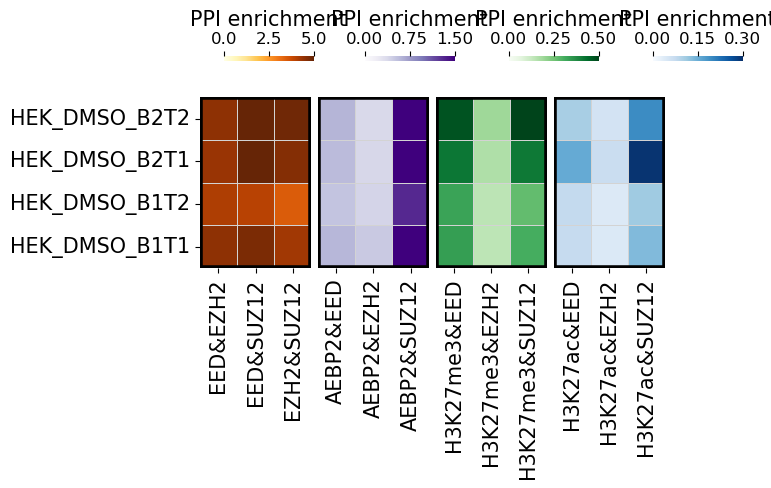

In [9]:
plot_cmaps = [
    sns.color_palette("YlOrBr", as_cmap = True),
    sns.color_palette("Purples", as_cmap = True),
    sns.color_palette("Greens", as_cmap = True),
    sns.color_palette("Blues", as_cmap = True),
]

PPI_plot_groups = [
    ["EED&EZH2", "EED&SUZ12", "EZH2&SUZ12"],
    ["AEBP2&EED", "AEBP2&EZH2", "AEBP2&SUZ12"],
    ["H3K27me3&EED", "H3K27me3&EZH2", "H3K27me3&SUZ12"],
    ["H3K27ac&EED", "H3K27ac&EZH2", "H3K27ac&SUZ12"],
]


fig = GroupedPPIHeatmap(TazDMSO_signals_normed[0:4], TazDMSO_nms[0:4], TazDMSO_pairnms, bc_pair_groups = PPI_plot_groups,
                  plot_cmaps = plot_cmaps,
                  sample_group_sizes = [4, 4], plot_vmax = [5, 1.5, 0.5, 0.3],
                    plot_vmin = [0, 0, 0, 0],
                  cbar_ax_locs = [
                      [0.165, 0.8, 0.15, 0.018],
                      [0.4, 0.8, 0.15, 0.018],
                      [0.64, 0.8, 0.15, 0.018],
                      [0.88, 0.8, 0.15, 0.018],
                  ],
                  plot_size = (6, 3)
                 )
# fig.savefig("TazDMSO_unmerge_right.svg", dpi = 1200)

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

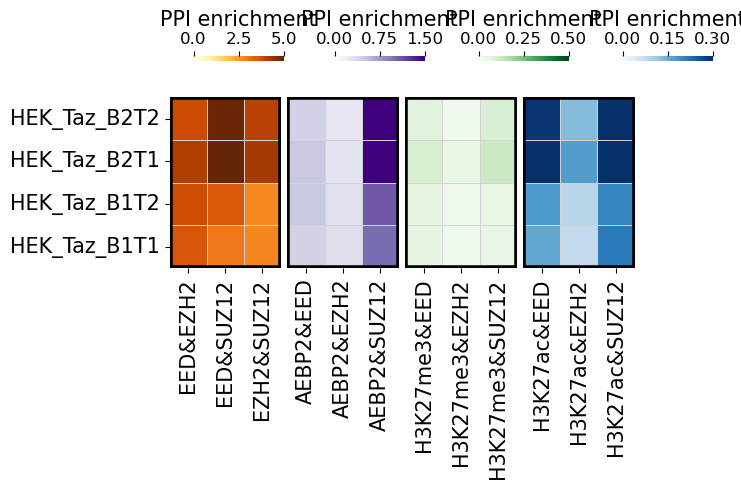

In [10]:
fig = GroupedPPIHeatmap(TazDMSO_signals_normed[4:8], TazDMSO_nms[4:8], TazDMSO_pairnms, bc_pair_groups = PPI_plot_groups,
                  plot_cmaps = plot_cmaps,
                  sample_group_sizes = [4, 4], plot_vmax = [5, 1.5, 0.5, 0.3],
                    plot_vmin = [0, 0, 0, 0],
                  cbar_ax_locs = [
                      [0.165, 0.8, 0.15, 0.018],
                      [0.4, 0.8, 0.15, 0.018],
                      [0.64, 0.8, 0.15, 0.018],
                      [0.88, 0.8, 0.15, 0.018],
                  ],
                  plot_size = (6, 3)
                 )
# fig.savefig("TazDMSO_unmerge_left.svg", dpi = 1200)

In [11]:
otheroption_signalpath = "/path/to/HEK293T_output.PPIEnrichment.tsv" # In main figure without averaging replicates
otheroption_signals_unorder, otheroption_nms_unorder, otheroption_pairnms = ReadProdTSVFile(otheroption_signalpath)

reorder_idx = [7, 6, 3, 2, 5, 4, 1, 0]
otheroption_nms = [otheroption_nms_unorder[x] for x in reorder_idx]
otheroption_signals_normed = []
for idx in reorder_idx:
    curr_row = otheroption_signals_unorder[idx]
    otheroption_signals_normed.append([x / curr_row[49] for x in curr_row])

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

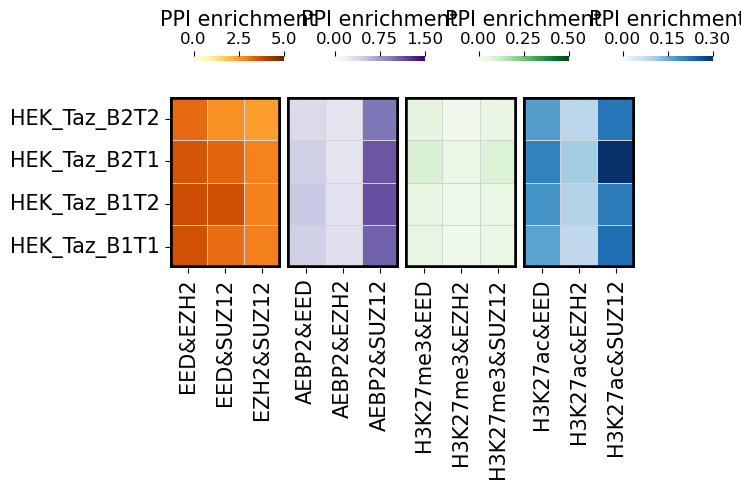

In [12]:
fig = GroupedPPIHeatmap(otheroption_signals_normed[0:4], otheroption_nms[0:4], TazDMSO_pairnms, bc_pair_groups = PPI_plot_groups,
                  plot_cmaps = plot_cmaps,
                  sample_group_sizes = [4, 4], plot_vmax = [5, 1.5, 0.5, 0.3],
                    plot_vmin = [0, 0, 0, 0],
                  cbar_ax_locs = [
                      [0.165, 0.8, 0.15, 0.018],
                      [0.4, 0.8, 0.15, 0.018],
                      [0.64, 0.8, 0.15, 0.018],
                      [0.88, 0.8, 0.15, 0.018],
                  ],
                  plot_size = (6, 3)
                 )
# fig.savefig("TazDMSO_otheroption_right.svg", dpi = 1200)

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

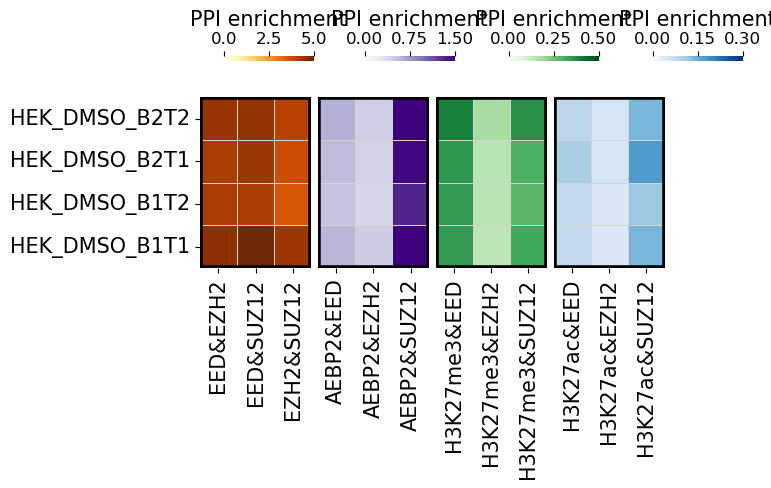

In [13]:
fig = GroupedPPIHeatmap(otheroption_signals_normed[4:8], otheroption_nms[4:8], TazDMSO_pairnms, bc_pair_groups = PPI_plot_groups,
                  plot_cmaps = plot_cmaps,
                  sample_group_sizes = [4, 4], plot_vmax = [5, 1.5, 0.5, 0.3],
                    plot_vmin = [0, 0, 0, 0],
                  cbar_ax_locs = [
                      [0.165, 0.8, 0.15, 0.018],
                      [0.4, 0.8, 0.15, 0.018],
                      [0.64, 0.8, 0.15, 0.018],
                      [0.88, 0.8, 0.15, 0.018],
                  ],
                  plot_size = (6, 3)
                 )
# fig.savefig("TazDMSO_otheroption_left.svg", dpi = 1200)